In [1]:
import torch

In [26]:
# soft moa
# soft_moa_experts = 'LoRAQ LoRAK LoRAV Prompt LoRAO LoRAUP ParallelAdapter'
# path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/math_14k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_swi_x4_blr6e-3_maxseq300_flashatt2False_bf16True_sigmoid1Gpu/AddSub_mingen120_router_caserouter_case.pth'
# moa_experts  = soft_moa_experts
# sparse moa
sparse_moa_experts = 'LoRAQ LoRAK LoRAV LoRAO LoRAUP ParallelAdapter Threshold'
path = '/home2/caojie/outputs/LLaMA3-1_smoe_structure/math_14k/b32_gpu2_bsg8_ep2_wep1_loral0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_maxth0.5_constWFalse_noisyFalse_palayers0-32_pasize16_promptl0-0_promptl10_swi_x4_blr6e-3_maxseq300_flashatt2False_bf16True_abla_Thre/AddSub_mingen120_router_caserouter_case.pth'
moa_experts  = sparse_moa_experts

# path = path.replace('AddSub', 'gsm8k')

In [27]:
data = torch.load(path)

/tmp/ipykernel_3361171/3488048829.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path)


In [28]:
data[0][0]['weights'].shape

torch.Size([1, 103, 7])

In [6]:
data[0]['words'].__len__()

103

In [29]:
data[0]

{0: {'weights': tensor([[[0.5078, 0.5078, 0.4551, 0.4863, 0.5195, 0.3594, 0.2520],
           [0.5117, 0.5117, 0.4414, 0.4824, 0.5273, 0.3203, 0.2520],
           [0.5156, 0.5156, 0.4160, 0.4766, 0.5312, 0.2676, 0.2520],
           [0.5117, 0.5117, 0.4395, 0.4805, 0.5234, 0.3164, 0.2520],
           [0.5195, 0.5156, 0.4023, 0.4766, 0.5391, 0.0000, 0.2520],
           [0.5156, 0.5156, 0.4219, 0.4785, 0.5312, 0.2773, 0.2520],
           [0.5234, 0.5156, 0.4004, 0.4746, 0.5391, 0.0000, 0.2520],
           [0.5117, 0.5117, 0.4355, 0.4805, 0.5234, 0.3125, 0.2520],
           [0.5195, 0.5156, 0.4043, 0.4746, 0.5391, 0.0000, 0.2500],
           [0.5117, 0.5117, 0.4316, 0.4785, 0.5273, 0.3047, 0.2520],
           [0.5195, 0.5156, 0.4141, 0.4766, 0.5352, 0.2637, 0.2539],
           [0.5117, 0.5117, 0.4355, 0.4805, 0.5234, 0.3125, 0.2520],
           [0.5234, 0.5156, 0.3926, 0.4707, 0.5430, 0.0000, 0.2520],
           [0.5156, 0.5156, 0.4219, 0.4785, 0.5312, 0.2773, 0.2520],
           [0.5156, 

In [9]:
example = data[0]

layers_weights = torch.stack([example[i]['weights'].squeeze(0) for i in range(32)],dim=1)

In [10]:
layers_weights.shape

torch.Size([103, 32, 7])

In [11]:
weights = torch.mean(layers_weights,1)

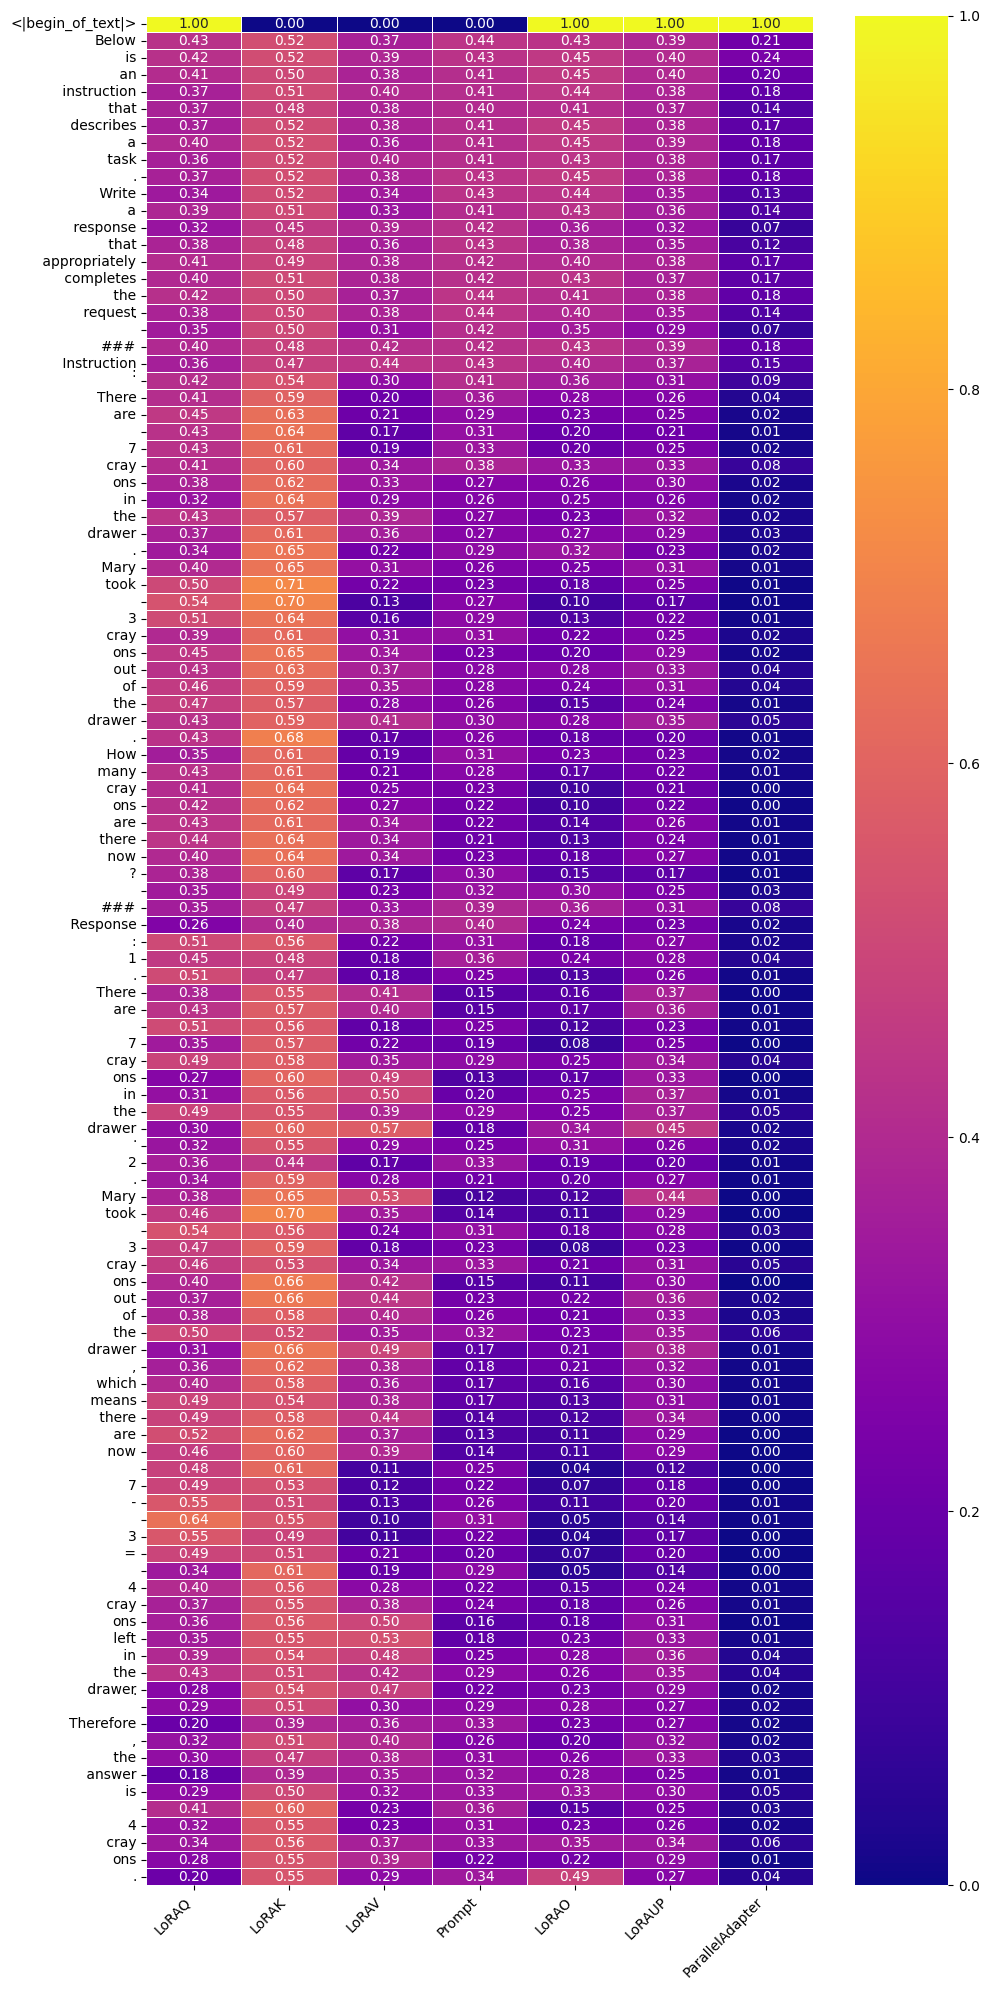

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

example = data[0] #0 1 5 8 11 15

# 示例数据准备（请根据实际数据替换）
words = example['words']  # 示例单词列表（Y轴）
experts = moa_experts.split()  # X轴专家标签

layer = 14 #  data 0 layer 14 for sparsemoa 
# 权重矩阵（单词数 x 专家数）
weights = example[layer]['weights'].squeeze(0).to(torch.float16).cpu().numpy()   # 第i层   sparse moa 14

# layers_weights = torch.stack([example[i]['weights'].squeeze(0) for i in range(32)],dim=1) # 32层均值
# weights = torch.mean(layers_weights,1).to(torch.float16).cpu().numpy()  
# 创建画布
plt.figure(figsize=(10, 20))

# 绘制热力图
heatmap = sns.heatmap(weights,
                      annot=True,        # 显示数值
                      fmt=".2f",         # 数值格式
                      cmap="plasma",    # 颜色映射
                      vmin=0, vmax=1,    # 颜色范围
                      linewidths=0.5,
                      xticklabels=experts,
                      yticklabels=words)

# 设置坐标轴标签
# plt.xlabel("MOE Experts", fontsize=12)
# plt.ylabel("Tokens", fontsize=12)
# plt.title("Expert Activation Weights per Token", fontsize=14, pad=20)

# 调整布局
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
# plt.savefig(f'router_case_sparse_moa_layer{layer}.pdf', bbox_inches='tight', dpi=350)
plt.savefig(f'router_case_soft_moa_layer{layer}.pdf', bbox_inches='tight', dpi=350)

# 显示图形
plt.show()

### Standard deviation of router weight for each token

In [31]:
std_list = []
for x in data:
    layers_weights = torch.stack([x[i]['weights'].squeeze(0) for i in range(32)], dim=1)
    if 'Threshold' in moa_experts:
        layers_weights = layers_weights[:,:,:-1]
        print(layers_weights.shape)
    # print(layers_weights.shape)
    std = layers_weights.std(dim=2)
    std = std.mean()
    std_list.append(std.cpu().item())
    print(std)

print(sum(std_list)/len(std_list))

torch.Size([103, 32, 6])
tensor(0.2781, device='cuda:0')
torch.Size([103, 32, 6])
tensor(0.2795, device='cuda:0')
torch.Size([131, 32, 6])
tensor(0.2812, device='cuda:0')
torch.Size([147, 32, 6])
tensor(0.2807, device='cuda:0')
torch.Size([244, 32, 6])
tensor(0.2538, device='cuda:0')
torch.Size([97, 32, 6])
tensor(0.2781, device='cuda:0')
torch.Size([131, 32, 6])
tensor(0.2822, device='cuda:0')
torch.Size([119, 32, 6])
tensor(0.2834, device='cuda:0')
torch.Size([108, 32, 6])
tensor(0.2728, device='cuda:0')
torch.Size([124, 32, 6])
tensor(0.2833, device='cuda:0')
torch.Size([158, 32, 6])
tensor(0.2804, device='cuda:0')
torch.Size([113, 32, 6])
tensor(0.2778, device='cuda:0')
torch.Size([129, 32, 6])
tensor(0.2791, device='cuda:0')
torch.Size([223, 32, 6])
tensor(0.2548, device='cuda:0')
torch.Size([184, 32, 6])
tensor(0.2780, device='cuda:0')
torch.Size([106, 32, 6])
tensor(0.2749, device='cuda:0')
torch.Size([148, 32, 6])
tensor(0.2759, device='cuda:0')
torch.Size([139, 32, 6])
tensor(

### Adamole

In [36]:
path = '/home2/caojie/outputs/LLaMA3-1_smoe/math_14k/b32_epoch1_warme0.4_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum8_adamoleTrue_noisy_routerFalse_lb_loss_coeff0_blr6e-3_maxseq300_flashatt2False_bf16True_/AddSub_mingen120_router_caserouter_case.pth'

In [37]:
data = torch.load(path)

/tmp/ipykernel_3361171/3488048829.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path)


In [38]:
data[0][0]['weights'].shape

torch.Size([133, 8])

In [39]:
std_list = []
for x in data:
    layers_weights = torch.stack([x[i]['weights'] for i in range(32)], dim=1)
    
    print(layers_weights.shape)
    std = layers_weights.std(dim=2)
    std = std.mean()
    std_list.append(std.cpu().item())
    print(std)

print(sum(std_list)/len(std_list))

torch.Size([133, 32, 8])
tensor(0.0657, device='cuda:0')
torch.Size([103, 32, 8])
tensor(0.0655, device='cuda:0')
torch.Size([130, 32, 8])
tensor(0.0636, device='cuda:0')
torch.Size([153, 32, 8])
tensor(0.0646, device='cuda:0')
torch.Size([246, 32, 8])
tensor(0.0593, device='cuda:0')
torch.Size([121, 32, 8])
tensor(0.0666, device='cuda:0')
torch.Size([132, 32, 8])
tensor(0.0648, device='cuda:0')
torch.Size([117, 32, 8])
tensor(0.0660, device='cuda:0')
torch.Size([137, 32, 8])
tensor(0.0647, device='cuda:0')
torch.Size([124, 32, 8])
tensor(0.0661, device='cuda:0')
torch.Size([166, 32, 8])
tensor(0.0641, device='cuda:0')
torch.Size([119, 32, 8])
tensor(0.0644, device='cuda:0')
torch.Size([126, 32, 8])
tensor(0.0643, device='cuda:0')
torch.Size([233, 32, 8])
tensor(0.0597, device='cuda:0')
torch.Size([155, 32, 8])
tensor(0.0630, device='cuda:0')
torch.Size([106, 32, 8])
tensor(0.0643, device='cuda:0')
torch.Size([155, 32, 8])
tensor(0.0646, device='cuda:0')
torch.Size([139, 32, 8])
tensor

In [40]:
std_list

[0.0657104104757309,
 0.0654805600643158,
 0.06362766027450562,
 0.06457709521055222,
 0.059258244931697845,
 0.06661302596330643,
 0.0648462250828743,
 0.06602858006954193,
 0.06469512730836868,
 0.06614821404218674,
 0.06406429409980774,
 0.06438695639371872,
 0.0643029734492302,
 0.05971120297908783,
 0.06301962584257126,
 0.06433357298374176,
 0.06457637250423431,
 0.0652373880147934,
 0.0658043846487999,
 0.06518799066543579]